## 1.Análisis exploratorio de los datos

In [36]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import seaborn as sns
import matplotlib.pyplot as plt


# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [18]:
# lectura de datos en Python y lo cargamos en la variable Datos

datos = pd.read_csv('E:/Nextcloud/Universidad/Analisis de datos/Tarea 3/Dataset Arboles de Decisión/archive/winequality-red.csv')

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

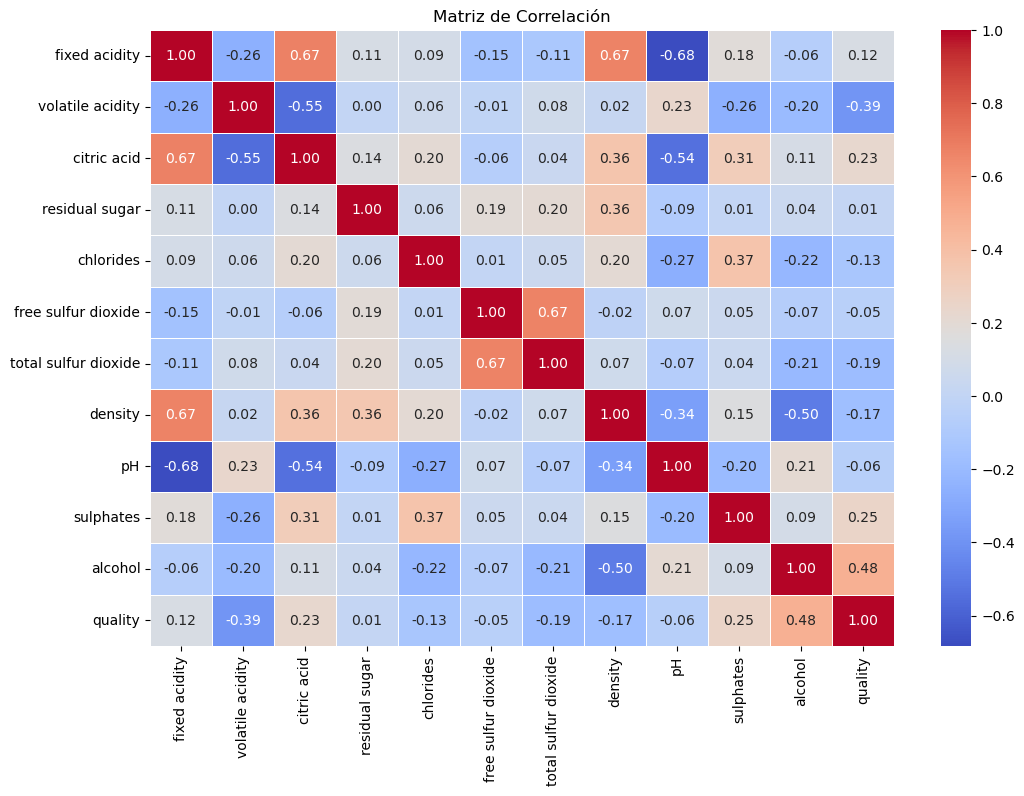

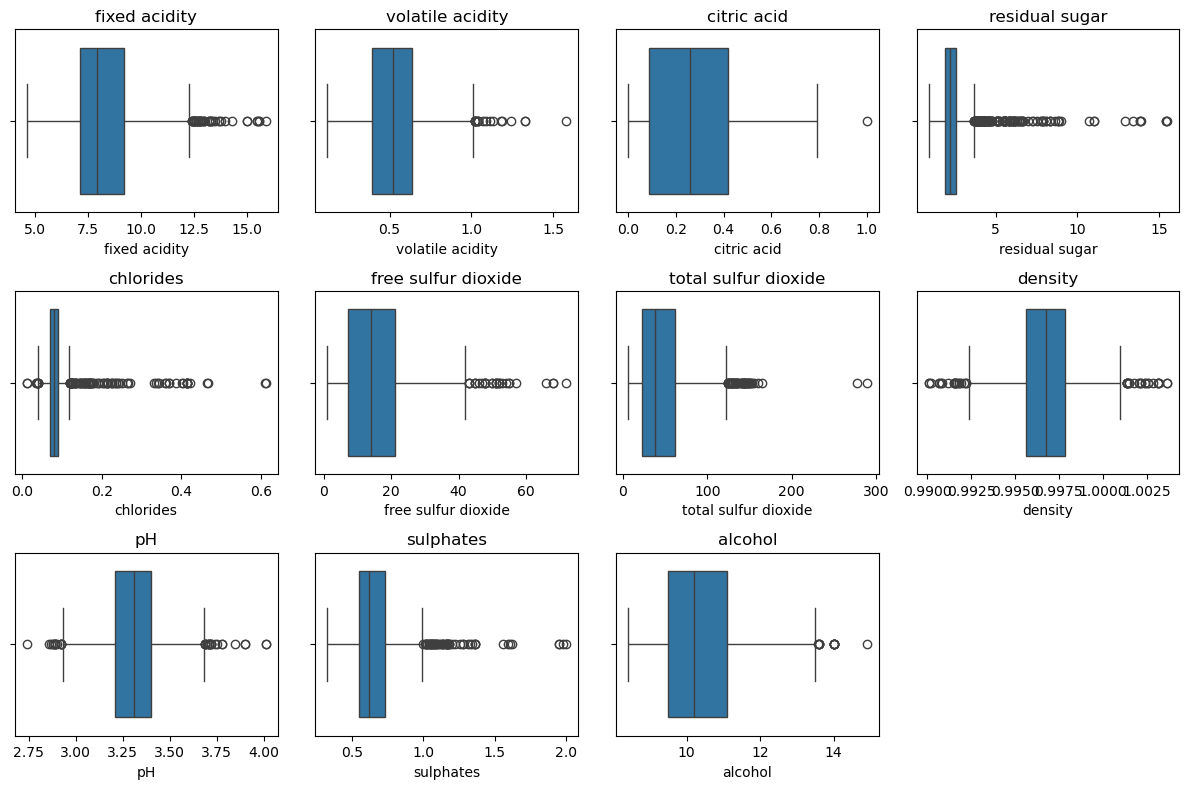

In [27]:
# Descripción general de los datos
print(datos.describe())

# Calcular la matriz de correlación
correlacion = datos.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Boxplot para detectar valores atípicos
plt.figure(figsize=(12, 8))
for i, columna in enumerate(datos.columns[:-1], 1):  # Excluimos 'quality' porque es la variable objetivo
    plt.subplot(3, 4, i)
    sns.boxplot(x=datos[columna])
    plt.title(columna)

plt.tight_layout()
plt.show()

Resumen estadístico: El análisis de las estadísticas descriptivas muestra que tenemos valores para todas las variables, y algunas de ellas, como el alcohol y la acidez fija, tienen una variabilidad significativa.

Matriz de correlación:

Las variables alcohol y quality muestran una correlación positiva fuerte, lo que sugiere que un mayor contenido de alcohol podría estar relacionado con una mejor calidad del vino.

También hay relaciones entre variables como sulphates y quality.

Boxplots:

Los boxplots muestran que hay algunos valores atípicos en variables como residual sugar, chlorides, free sulfur dioxide, y total sulfur dioxide. Sin embargo, no parece haber valores extremos graves en muchas de las variables.

## 2. Preprocesamiento de los datos

In [29]:
# Verificar si hay valores faltantes
valores_faltantes = datos.isnull().sum()
print(f"Valores faltantes en cada columna:\n{valores_faltantes}")

# Escalar las variables numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columnas_numericas = datos.drop('quality', axis=1).columns  # Excluimos 'quality' de la normalización
datos[columnas_numericas] = scaler.fit_transform(datos[columnas_numericas])

# Ver cómo quedaron los datos después de la normalización
datos.head()


Valores faltantes en cada columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5


 ## 3. Selección de características

Los árboles de decisión tienen características relevantes por sí mismos

 ## 4. Dividir el dataset en Train y Test

In [46]:
# Definir la variable dependiente (y) y las variables independientes (X)
X = datos.drop('quality', axis=1)  # Excluimos 'quality' de X
y = datos['quality']  # 'quality' es la variable dependiente

# Dividir el dataset en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

# Ahora podemos continuar con el entrenamiento del modelo
from sklearn.tree import DecisionTreeRegressor

# Crear una instancia del modelo con parámetros ajustados
modelo_arbol = DecisionTreeRegressor(max_depth=5, random_state=42)  # Limitamos la profundidad para evitar sobreajuste

# Entrenar el modelo con los datos de entrenamiento
modelo_arbol.fit(X_train, y_train)

# Ver los coeficientes de las características seleccionadas
importances = modelo_arbol.feature_importances_
feature_names = X.columns

# Mostrar la importancia de las características
features_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
features_importance = features_importance.sort_values(by='Importance', ascending=False)

print(features_importance)

Tamaño del conjunto de entrenamiento: 1279
Tamaño del conjunto de prueba: 320
                 Feature  Importance
10               alcohol    0.454964
9              sulphates    0.241224
1       volatile acidity    0.140277
6   total sulfur dioxide    0.075190
5    free sulfur dioxide    0.025698
4              chlorides    0.021632
7                density    0.016034
3         residual sugar    0.011893
8                     pH    0.010525
0          fixed acidity    0.002563
2            citric acid    0.000000


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [54]:
# Entrenar el modelo con los datos de entrenamiento
modelo_arbol.fit(X_train, y_train)

# Ver la puntuación del modelo en el conjunto de entrenamiento
print(f"Puntuación en el conjunto de entrenamiento: {modelo_arbol.score(X_train, y_train)}")

Puntuación en el conjunto de entrenamiento: 0.46888580470080277


## 6: Evaluar el desempeño del modelo en el conjunto de Test

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Hacer predicciones con el conjunto de prueba
y_pred = modelo_arbol.predict(X_test)

# Calcular las métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calcular RMSE manualmente
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R²: {r2}")

Mean Absolute Error (MAE): 0.4963861466527857
Mean Squared Error (MSE): 0.43350969496749786
Root Mean Squared Error (RMSE): 0.6584145312548151
R²: 0.3366399264084673


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

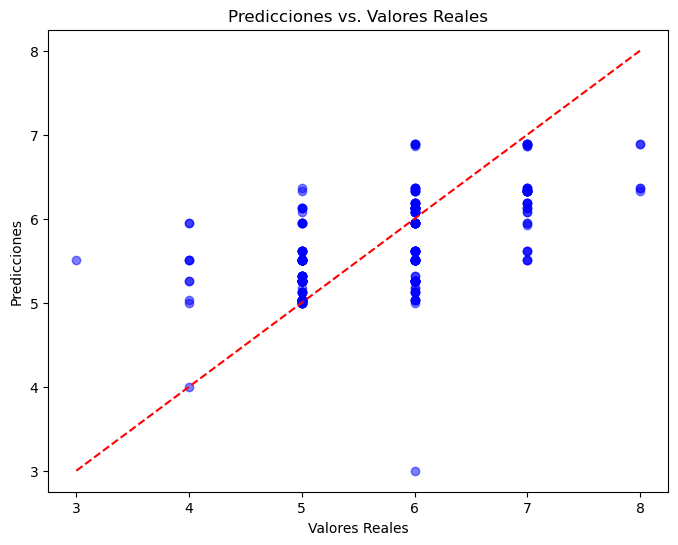

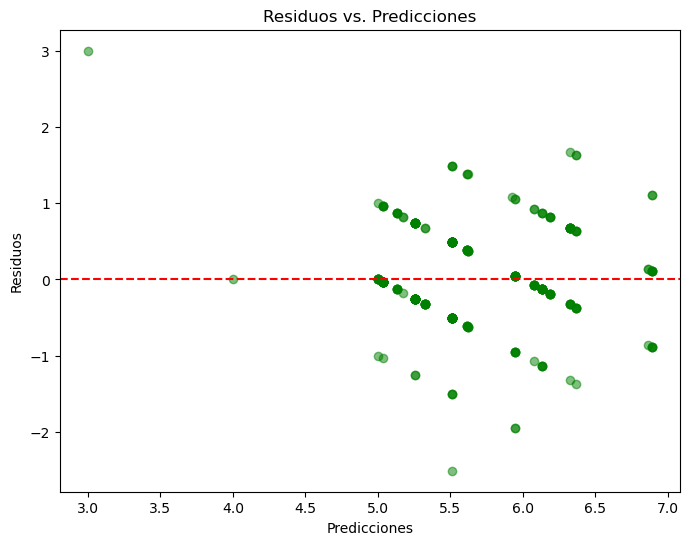

In [60]:
# Gráfico de dispersión: Predicciones vs. Valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de identidad
plt.title("Predicciones vs. Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.show()

# Gráfico de residuos: Diferencia entre predicciones y valores reales
residuos = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuos vs. Predicciones")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos

EL R² y RMSE nos dan una buena idea de la calidad del modelo. Si el R² es cercano a 1, significa que el modelo explica bien la variabilidad de los datos.

El gráfico de predicciones vs. valores reales debería mostrar qué tan bien el modelo realiza las predicciones.

El gráfico de residuos debe tener residuos aleatorios alrededor de cero si el modelo es adecuado.